Processing file: input/sinDataComplex.txt
{'OSR': 1, 'fs': 10000.0, 'fc': 0, 'lut_width': 1}
0
Saved spectrum plot to ./figs/sinDataComplex_spectrum.png


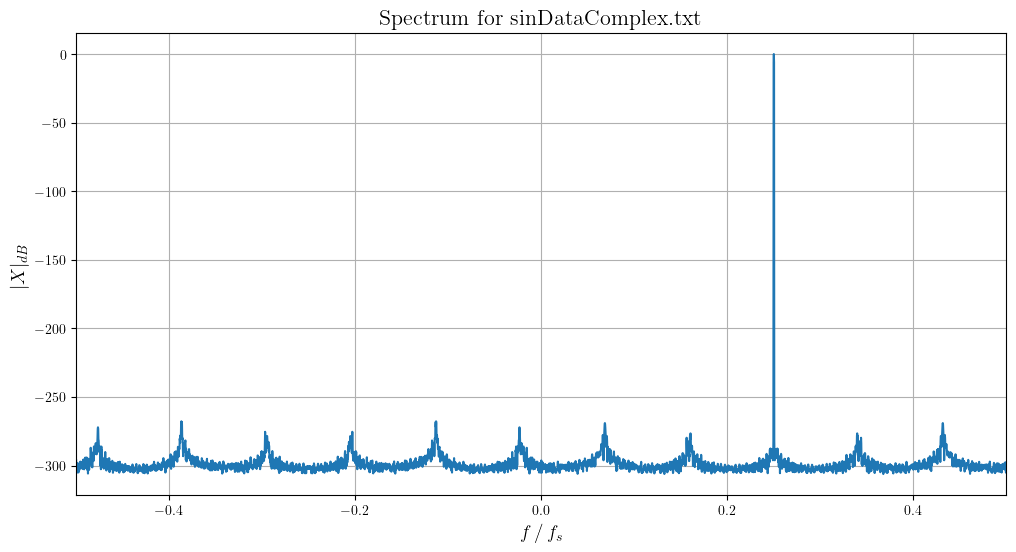

Processed real data from input/sinDataComplex.txt
Processing file: ./output/signalR_delay_5.txt
{'OSR': 1, 'fs': 10000.0, 'fc': 0, 'lut_width': 1}
0
Saved spectrum plot to ./figs/signalR_delay_5_spectrum.png


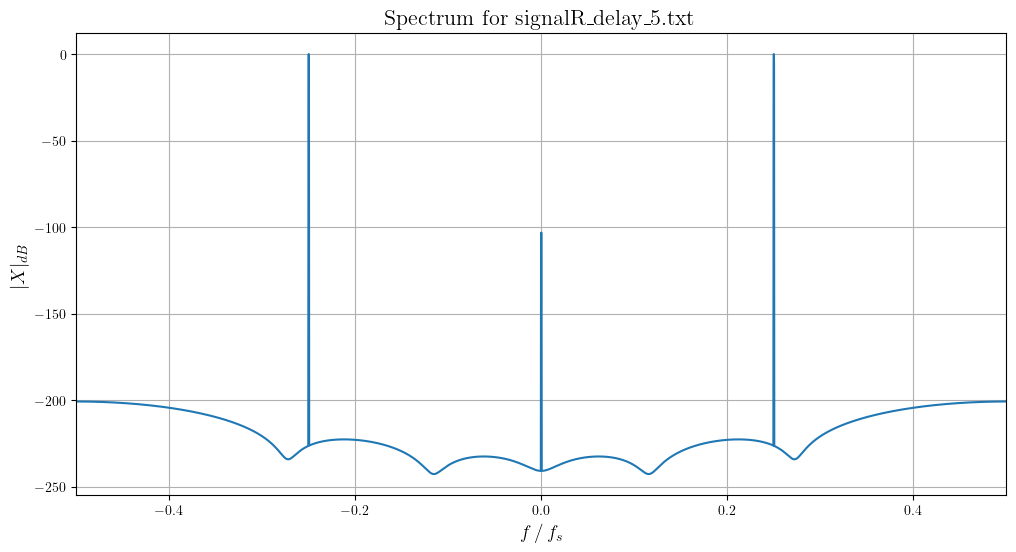

Processed real data from ./output/signalR_delay_5.txt
Processing file: ./output/signalI_delay_25.txt
{'OSR': 1, 'fs': 10000.0, 'fc': 0, 'lut_width': 1}
0
Saved spectrum plot to ./figs/signalI_delay_25_spectrum.png


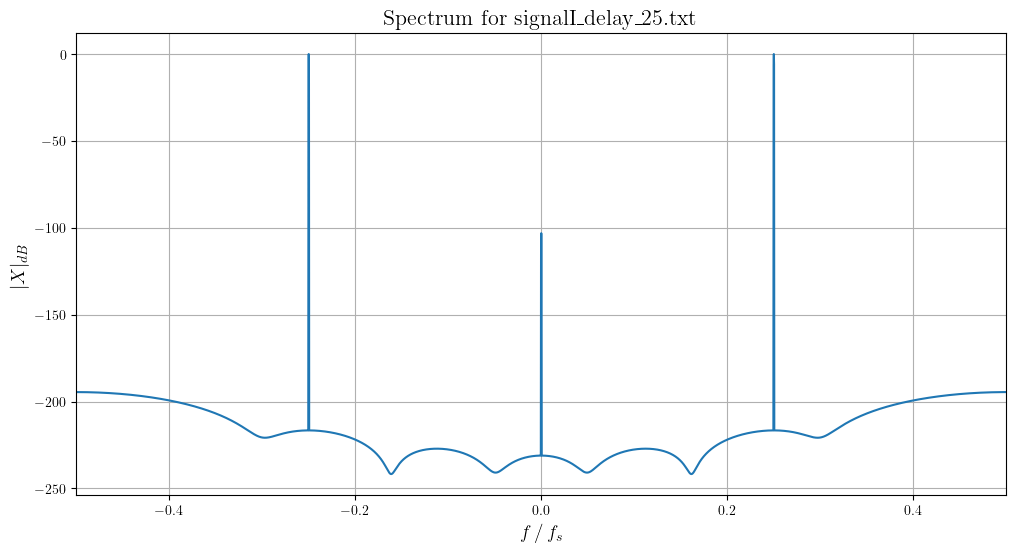

Processed real data from ./output/signalI_delay_25.txt
Processing file: ./output/signalR_OSR_8.txt
{'OSR': 8, 'fs': 10000.0, 'fc': 0, 'lut_width': 1}
0
Saved spectrum plot to ./figs/signalR_OSR_8_spectrum.png


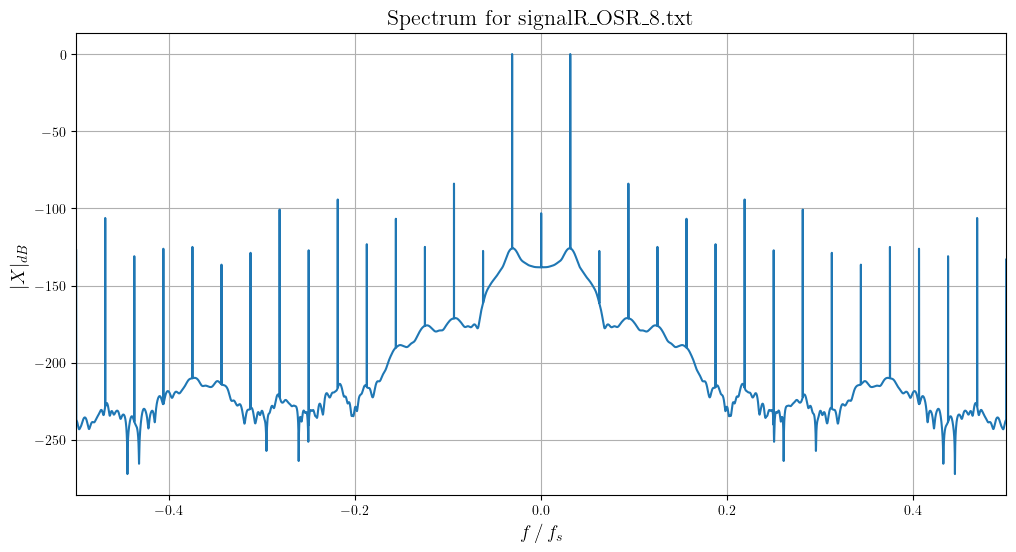

Processed real data from ./output/signalR_OSR_8.txt
Processing file: ./output/signalI_OSR_8.txt
{'OSR': 8, 'fs': 10000.0, 'fc': 0, 'lut_width': 1}
0
Saved spectrum plot to ./figs/signalI_OSR_8_spectrum.png


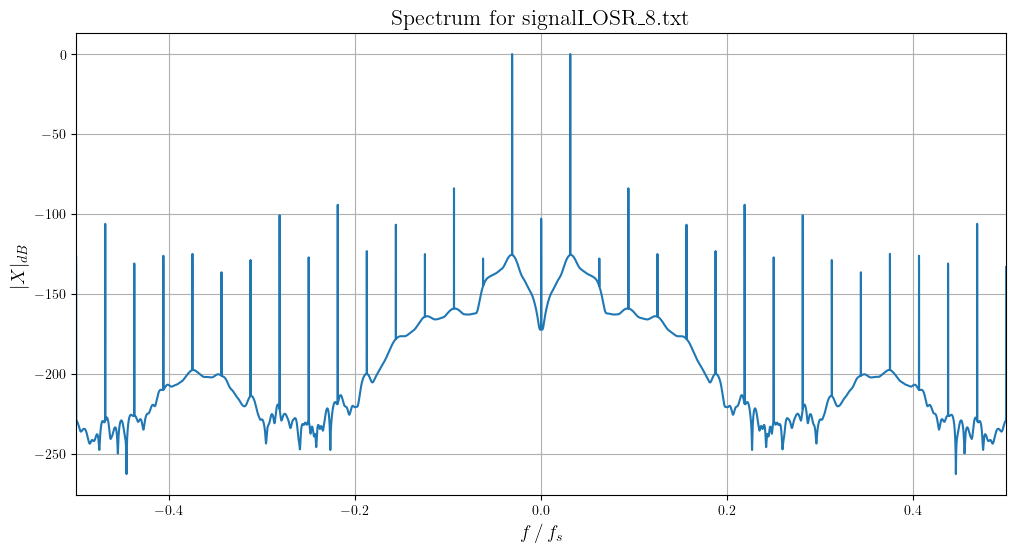

Processed real data from ./output/signalI_OSR_8.txt
Processing file: ./output/signalR_deltaSigma.txt
{'OSR': 8, 'fs': 10000.0, 'fc': 0, 'lut_width': 1}
0
Saved spectrum plot to ./figs/signalR_deltaSigma_spectrum.png


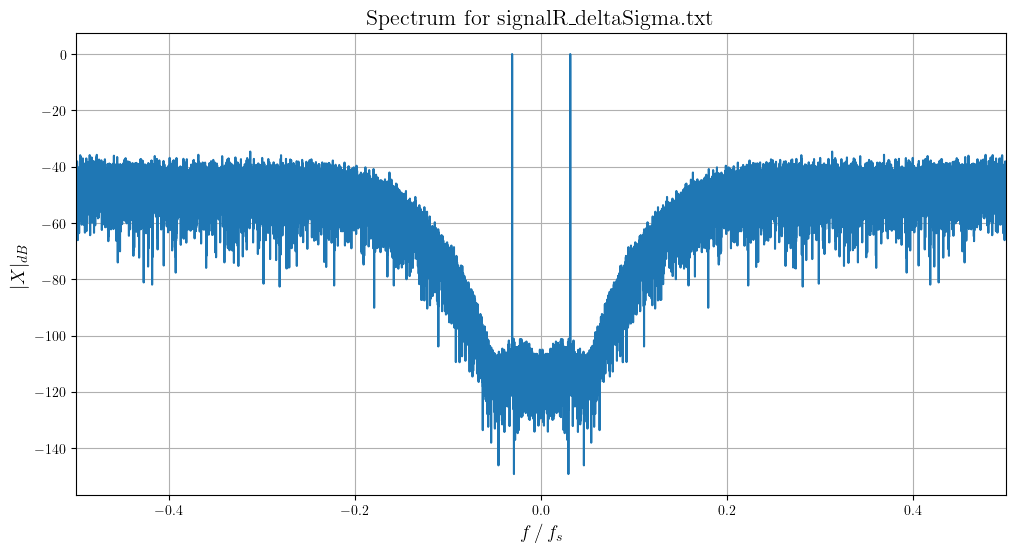

Processed real data from ./output/signalR_deltaSigma.txt
Processing file: ./output/signalI_deltaSigma.txt
{'OSR': 8, 'fs': 10000.0, 'fc': 0, 'lut_width': 1}
0
Saved spectrum plot to ./figs/signalI_deltaSigma_spectrum.png


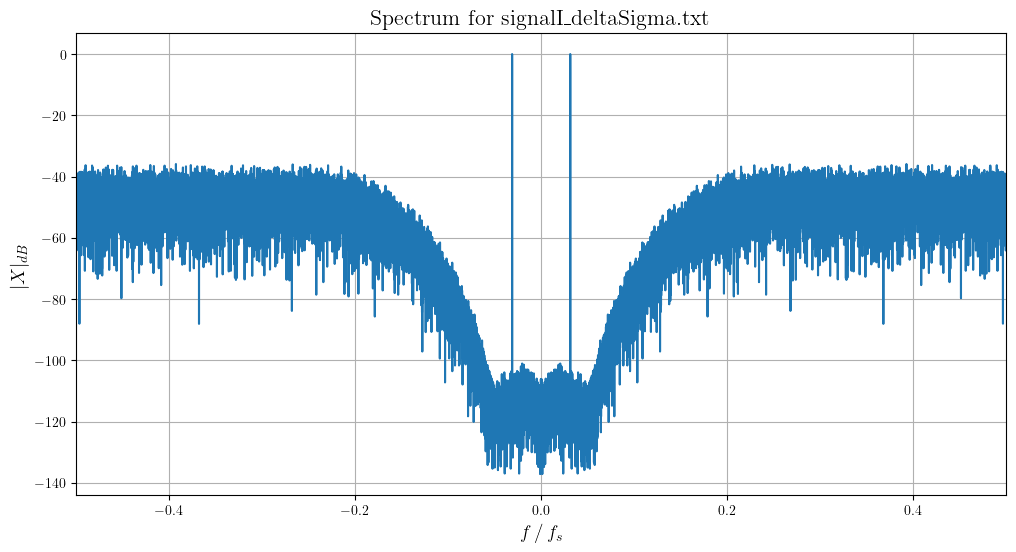

Processed real data from ./output/signalI_deltaSigma.txt
Processing file: ./output/signalR_serial.txt
{'OSR': 8, 'fs': 10000.0, 'fc': 0, 'lut_width': 32}
0
Saved spectrum plot to ./figs/signalR_serial_spectrum.png


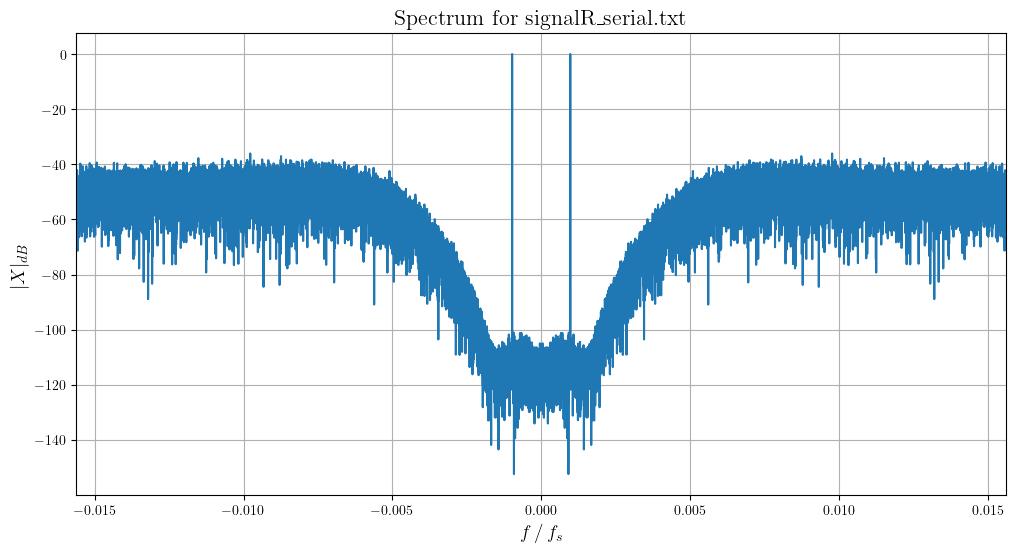

Processed real data from ./output/signalR_serial.txt
Processing file: ./output/signalI_serial.txt
{'OSR': 8, 'fs': 10000.0, 'fc': 0, 'lut_width': 32}
0
Saved spectrum plot to ./figs/signalI_serial_spectrum.png


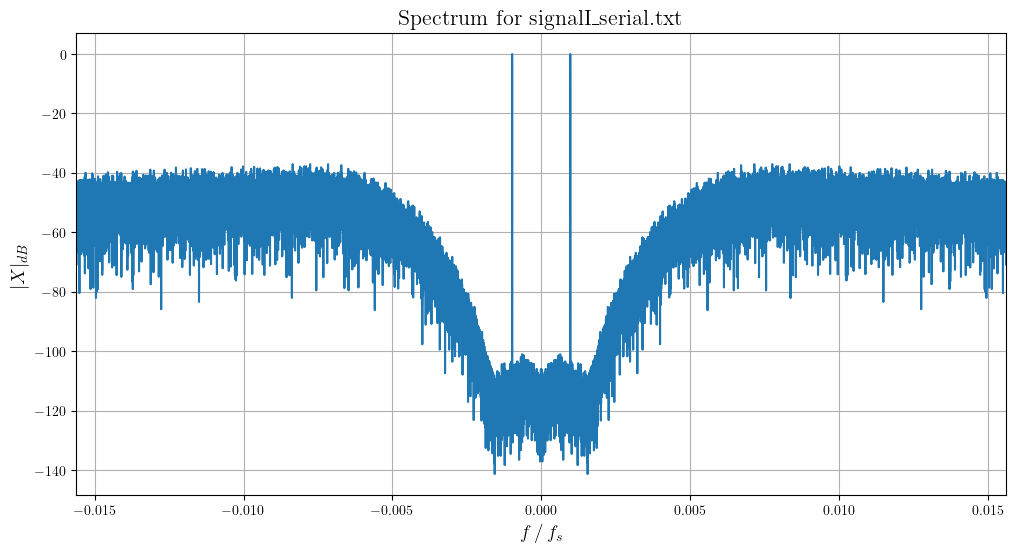

Processed real data from ./output/signalI_serial.txt
Processing file: ./output/signal_rfiq_80_80_3.txt
{'OSR': 8, 'fs': 10000.0, 'fc': 1, 'lut_width': 32}
1
Saved spectrum plot to ./figs/signal_rfiq_80_80_3_spectrum.png


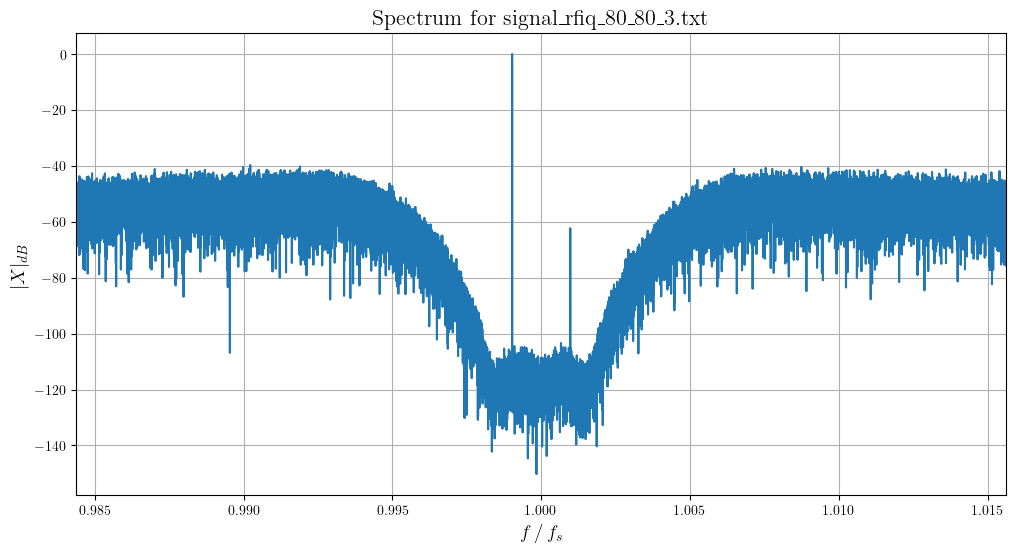

Processed real data from ./output/signal_rfiq_80_80_3.txt


In [1]:
#!/usr/bin/env python3

import os
import sys
import numpy as np
import scipy.signal as signal
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False

# Enable LaTeX rendering
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def read_file_with_header(file_path):
    """
    Reads a file with metadata in the header and numerical data below.
    If a line (after header) contains two numbers, they are interpreted as the real
    and imaginary parts of a complex number.
    
    Args:
        file_path (str): Path to the input file.
    
    Returns:
        dict: Extracted metadata (OSR, fs, lut_width, etc.).
        np.ndarray: Numerical data as a NumPy array (complex numbers if two numbers per line).
    """
    metadata = {"OSR": 1, "fs": 1e3, "fc": 0, "lut_width": 1}  # Default values
    data = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                key_value = line[1:].strip().split("=")
                if len(key_value) == 2:
                    key, value = key_value[0].strip(), key_value[1].strip()
                    try:
                        if key in ["OSR", "fs", "fc", "lut_width"]:
                            metadata[key] = float(value) if '.' in value else int(value)
                    except ValueError:
                        pass
            else:
                # Try to split the line into parts (assuming whitespace separation)
                parts = line.strip().split()
                try:
                    if len(parts) == 2:
                        # Convert two numbers into a complex number
                        re, im = float(parts[0]), float(parts[1])
                        data.append(complex(re, im))
                    elif len(parts) == 1:
                        # Single number: just use as a float
                        data.append(float(parts[0]))
                    # If the line doesn't match these, ignore it.
                except ValueError:
                    pass  # Ignore lines that cannot be converted
    
    return metadata, np.array(data)

def process_file(file_path):
    """
    Processes a single file, extracting metadata, computing the spectrum, and saving plots.
    
    Args:
        file_path (str): Path to the file.
    """
    print(f"Processing file: {file_path}")
    metadata, data = read_file_with_header(file_path)
    print(metadata)

    if not data.size:
        print(f"Warning: No valid numerical data found in {file_path}")
        return

    # Extract metadata
    OSR = int(metadata.get("OSR", 1))
    fc = int(metadata.get("fc", 0))
    is_complex = metadata.get("complex", 0) == 1  # Check if the data is complex
    lut_width = metadata.get("lut_width", 1)

    # Compute the windowed data and spectrum
    w = signal.windows.hann(len(data), False)
    data_win = data * w
    spectrum = 20 * np.log10(np.abs(np.fft.fftshift(np.fft.fft(data_win))) + 1e-12)
    print(fc)

    if fc == 0:
        xmin = -0.5/lut_width
        xmax = 0.5/lut_width

        imin = int((xmin + 0.5) * len(data))
        imax = int((xmax + 0.5) * len(data))
    elif fc == 1:
        xmin = fc-0.5/lut_width
        xmax = fc+0.5/lut_width

        imin = int((xmin/4 + 0.5) * len(data))
        imax = int((xmax/4 + 0.5) * len(data))

    # x_min = -0.5/lut_width
    # x_max = 0.5/lut_width

    # i_min = int((x_min + 0.5) * len(spectrum))
    # i_max = int((x_max + 0.5) * len(spectrum))
    spectrum = spectrum[imin:imax]
    spectrum -= np.max(spectrum)

    freqs = np.linspace(xmin, xmax, len(spectrum))
    # freqs = (np.arange(len(data)) / len(data) - 0.5)

    # Plot the spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(freqs, spectrum, label="Spectrum")
    plt.title(f"Spectrum for {os.path.basename(file_path)}", fontsize=16)
    plt.xlabel(r"$f \, / \, f_s$", fontsize=14)
    plt.ylabel(r"$|X|_{dB}$", fontsize=14)

    # y_min = np.min(spectrum[int((xmin+0.5)*len(spectrum)):int((xmax+0.5)*len(spectrum))])
    # y_max = np.max(spectrum[int((xmin+0.5)*len(spectrum)):int((xmax+0.5)*len(spectrum))])

    # y_ticks = np.arange(y_max, y_min - 20, -20)  # Generate ticks from 0 to y_max with step of 20
    # plt.yticks(y_ticks)

    plt.xlim([xmin, xmax])
    # plt.ylim(y_min - 5, y_max + 5)

    plt.grid()

    # Save the figure
    file_name = os.path.basename(file_path).replace('.txt', '_spectrum.png')
    fig_path = os.path.join("./figs", file_name)
    plt.savefig(fig_path)
    print(f"Saved spectrum plot to {fig_path}")
    # plt.close()
    plt.show();

    # Additional printout for complex vs real
    data_type = "complex" if is_complex else "real"
    print(f"Processed {data_type} data from {file_path}")

import os
import glob

def main():
    # Process the input file first
    input_file = "input/sinDataComplex.txt"
    process_file(input_file)

    dir_path = "./output"
    
    # Get all .txt files in the output directory and sort by modification time with nanosecond precision
    output_files = sorted(glob.glob(f"{dir_path}/*.txt"), key=lambda x: os.stat(x).st_mtime_ns)
    
    if not output_files:
        print(f"No .txt files found in {dir_path}")
        return

    for file_path in output_files:
        process_file(file_path)

if __name__ == "__main__":
    main()

In [11]:
(-0.015625 + 0.5)*

0.484375

[-1. -1.  1. ...  1.  1. -1.]
[-0.00000000e+00 -5.60995694e-13  2.24409380e-12 ...  5.04918329e-12
  2.24409380e-12 -5.60995694e-13]
4194304


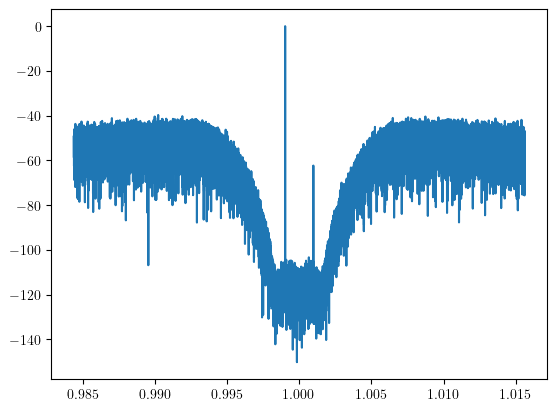

In [45]:
file_path = "output/signal_rfiq_80_80_3.txt"
metadata, data = read_file_with_header(file_path)
data = np.array(data)
print(data)
data += 0
w = signal.windows.hann(len(data), False)
data *= w
print(data)

lut_width = 32
# i_min = int((1-0.5/lut_width)*len(data))
# i_max = int((1+0.5/lut_width)*len(data))
# print(i_min, i_max)
# data = data[i_min:i_max]

print(len(data))

freqs = (np.arange(len(data)) / len(data) - 0.5) * 4

xfft = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(data))) + 1e-12)
# plt.plot(freqs, xfft)

xmin = (1-0.5/lut_width)
xmax = (1+0.5/lut_width)

imin = int((xmin/4 + 0.5)*len(xfft))
imax = int((xmax/4 + 0.5)*len(xfft))

xfft = xfft[imin:imax]
xfft -= np.max(xfft)

freqs = freqs[imin:imax]
# freqs = np.linspace(xmin, xmax, len(xfft))
# plt.xlim([xmin, xmax])

plt.plot(freqs, xfft)

In [61]:
a = np.array([1.12, 0.05])
print(np.floor(a))

TypeError: return arrays must be of ArrayType

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from remezlp import remezlp

def genTestSpectrum(n, freq, amp, randPhase=False):
    # Generate test spectrum
    # Arguments:
    #    n    - number of samples
    #    freq - tuple of digital frequencies (startFreq, endFreq) in range (0, 0.5)
    #    amp  - tuple of amplitudes (ampStart, ampEnd)
    #    randPhase - if True, assign random phase to each sample
    x = np.zeros(n, dtype='complex128')
    freqStart, freqEnd = freq
    ampStart, ampEnd = amp
    indStart = round(n*freqStart)
    indEnd = round(n*freqEnd)
    x[indStart:indEnd] = ampStart - np.linspace(0, 1, num=indEnd-indStart) * (ampStart-ampEnd)
    if randPhase:
        x[indStart:indEnd] *= np.exp(1j*2*np.pi*np.random.rand(indEnd-indStart)) # randomize phase
    x[0] = abs(x[1])/2
    timeDomain = np.fft.ifft(x)
    return(timeDomain)
    
def expander(x, I):
    # Upsample the signal by factor I
    #   x - input signal
    #   I - upsampling factor
    nx = len(x)
    xI = np.zeros(nx*I, dtype=complex)
    xI[::I] = x
    return xI

def compressor(x, D):
    # Downsample the signal by factor D
    #   x - input signal
    #   D - downsampling factor
    return x[0::D]

def plotdB(x, win=False, epsilon=1e-12):
    if win==True:
        w = signal.windows.hamming(len(x), False)
        x *= w
    x += epsilon
    XdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x)) + epsilon))
    XdB -= np.max(XdB)
    freqs = np.arange(len(x))/len(x) - 0.5

    plt.plot(freqs, XdB)
    plt.grid()
    # plt.show();

def plot(x, win=False, epsilon=1e-15):
    if win==True:
        w = signal.hann(len(x), False)
        x *= w
    Xfft = np.abs(np.fft.fftshift(np.fft.fft(x)))
    Xfft /= np.max(Xfft)
    freqs = np.arange(len(x))/len(x) - 0.5
    plt.plot(freqs, Xfft)
    plt.grid()
    

def makePolyphase(coeff, M):
    # Split coefficients into polyphase components
    n = int(np.ceil(len(coeff)/M))
    tmp = np.zeros(n*M)
    tmp[:len(coeff)] = coeff
    polyCoeff = np.zeros((M,n))
    for i in range(M):
        polyCoeff[i,:] = tmp[i::M]
    return polyCoeff

def polyI(x, firCoeff, I):
    polyFIR = makePolyphase(firCoeff, I)
    xPoly = np.zeros(len(x)*I, dtype=x.dtype)
    for i in range(I):
        tmp = signal.lfilter(polyFIR[i], 1.0, np.concatenate((x, x[:int(len(firCoeff)/I-1)])))
        tmp = tmp[int(len(firCoeff)/I-1):]
        xPoly[i::I] = tmp
    return xPoly

def polyD(x, firCoeff, D):
    polyFIR = makePolyphase(firCoeff, I)
    x_ = np.concatenate((x, x[:int(len(firCoeff)-1)]))
    y = []
    for i in range(D):
        FIRin = x_[i::D]
        tmp = signal.lfilter(polyFIR[D-1-i], 1.0, FIRin)
        y = np.append(y, tmp)
    y = np.array(y)
    return y

def fftdB(x, epsilon=1e-12):
    return 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x)) + epsilon))

def interpolate(x, I, F, delta, show=False, prt=False):
    N = len(x)
    Fpass, Fstop = F[0], F[1]
    deltaPass, deltaStop = delta[0], delta[1]

    Fpass_arr = []
    Fstop_arr = []
    dF = []
    N_fir = []
    firCoeffs = []

    iterator = int(np.log(I)/np.log(2))
    for i in range(iterator):
        Fstop = (1 - Fpass)/2
        Fpass /= 2
        firCoeff = remezlp(Fpass, Fstop, deltaPass, deltaStop, even_n = False, nPoints=N, Nmax=N)
        # x = expander(x, 2)
        # x = signal.lfilter(firCoeff, 1.0, np.concatenate((x, x[:len(firCoeff)-1])))[len(firCoeff)-1:]
        x = polyI(x, firCoeff, 2)

        firCoeffs.append(firCoeff)
        Fpass_arr.append(Fpass)
        Fstop_arr.append(Fstop)
        dF.append(Fstop - Fpass)
        N_fir.append(firCoeff.size)
        if show:
            plotdB(x, win = True)
            plt.plot([-0.5,0.5], [-AdB, -AdB], '--r')
            plt.ylim([-150, 10])
            plt.show();
    if prt:
        print(f"Fpass = {Fpass_arr}")
        print(f"Fstop = {Fstop_arr}")
        print(f"dF = {dF}")
        print(f"N_fir = {N_fir}")
        print(firCoeffs)

    return x

def delay(x, firCoeff, I, l):
    polyFIR = makePolyphase(firCoeff, I)
    delayFIR = polyFIR[l]
    delay = int((len(firCoeff) - 1)/I/2)
    y = signal.lfilter(delayFIR, 1.0, x)
    # y = y[delay:]
    return y, delay

def convert_1b(x, LUT):
    y = []
    for i in range(len(x)):
        try:
            pos = int(x[i] + 8)
            tmp = [-1 if val == 0 else 1 for val in LUT[-1 - pos]]
            y = np.concatenate((y, tmp))
        except IndexError:
            print(f"IndexError: pos={pos} is out of bounds for LUT with length {len(LUT)}")
            continue  # Skip the current iteration if an error occurs
    return np.array(y)

def paralelToSerialConverter(x, LUT):
    y = []

    for i in range(len(x)):
        pos = int(x[i] + 8)
        y = np.concatenate((y, LUT[-1-pos]))
    return np.array(y)

LUT1 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # Level 8
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # Level 7
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],  # Level 6
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],  # Level 5
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],  # Level 4
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0],  # Level 3
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],  # Level 2
    [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # Level 1
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # Level 0
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],  # Level -1
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],  # Level -2
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],  # Level -3
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # Level -4
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # Level -5
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # Level -6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # Level -7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Level -8
]

LUT2 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # Level 8
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],  # Level 7
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],  # Level 6
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],  # Level 5
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],  # Level 4
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],  # Level 3
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0],  # Level 2
    [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0],  # Level 1
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # Level 0
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],  # Level -1
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],  # Level -2
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # Level -3
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # Level -4
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # Level -5
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # Level -6
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # Level -7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # Level -8
]

LUT3 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # Level 8
    [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],  # Level 7
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],  # Level 6
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1],  # Level 5
    [1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],  # Level 4
    [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],  # Level 3
    [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1],  # Level 2
    [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1],  # Level 1
    [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],  # Level 0
    [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0],  # Level -1
    [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0],  # Level -2
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],  # Level -3
    [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],  # Level -4
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],  # Level -5
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # Level -6
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # Level -7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # Level -8    
]

LUT4 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # Level 7.5
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],  # Level 6.5
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],  # Level 5.5
    [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1],  # Level 4.5
    [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1],  # Level 3.5
    [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1],  # Level 2.5
    [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1],  # Level 1.5
    [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1],  # Level 0.5
    [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],  # Level -0.5
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0],  # Level -1.5
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],  # Level -2.5
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],  # Level -3.5
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],  # Level -4.5
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # Level -5.5
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Level -6.5
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Level -7.5
]

LUT5 = [
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],  # Level 7.5
    [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],  # Level 6.5
    [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],  # Level 5.5
    [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1],  # Level 4.5
    [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1],  # Level 3.5
    [1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1],  # Level 2.5
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # Level 1.5
    [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0],  # Level 0.5
    [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1],  # Level -0.5
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # Level -1.5
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],  # Level -2.5
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],  # Level -3.5
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],  # Level -4.5
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],  # Level -5.5
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # Level -6.5
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]   # Level -7.5 


Fmax = 0.425


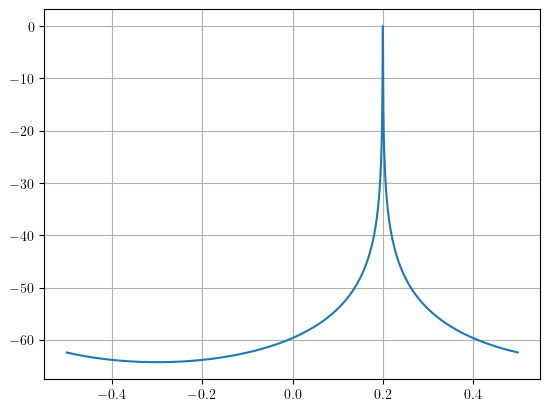

In [3]:
I = 8
N = 2**10
n = np.arange(N)

perc = 0.15
Fmax = 0.5 * (1 - perc)
print(f"Fmax = {Fmax}")

AdB = 60
deltaPass = 10**(-AdB/20)
deltaStop = deltaPass

F = [0.0, Fmax]
A = [1e-8, 1.0]
x = 2*genTestSpectrum(N, F, A, True)
amp = 1e-6
x += np.random.normal(-amp, amp, len(x))
x = 8.0 * np.exp(1j * 2*np.pi*0.2*n)
plotdB(x, False)

In [4]:
x_real = 2*x.real
x_imag = 2*x.imag

In [5]:
Fpass = Fmax / 2
Fstop = (1 - Fmax) / 2
firCoeff = remezlp(Fpass, Fstop, deltaPass, deltaStop, even_n = True, nPoints=N, Nmax=N)

x_imag_delayed, delay_val = delay(x_imag, firCoeff, 2, 1)

x_real_delayed = x_real[:-1 - delay_val + 1]
x_imag_delayed = x_imag_delayed [delay_val:]

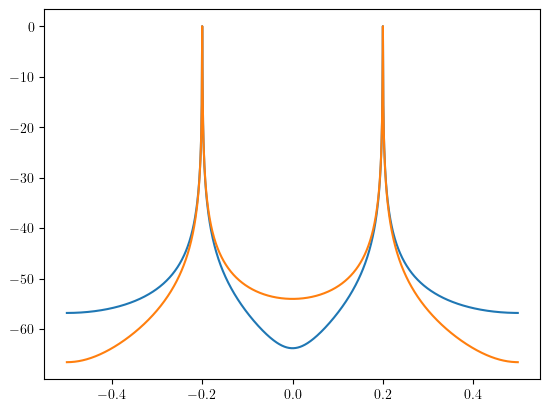

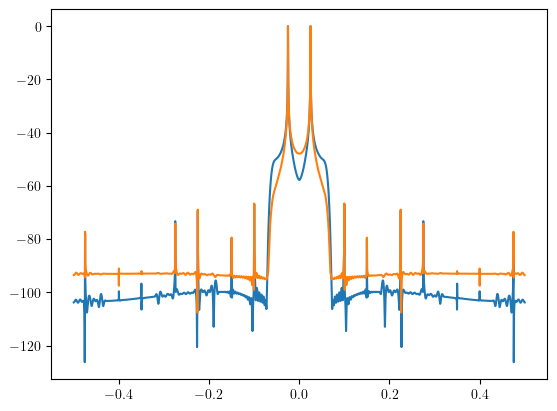

In [6]:
F = [Fmax, 1-Fmax]
delta = [deltaPass, deltaStop]

x_real_osr8 = interpolate(x_real_delayed, I, F, delta, show=False, prt=False)
x_imag_osr8 = interpolate(x_imag_delayed, I, F, delta, show=False, prt=False)

plotdB(x_real)
plotdB(x_imag)
plt.show();

plotdB(x_real_osr8)
plotdB(x_imag_osr8)
plt.show();

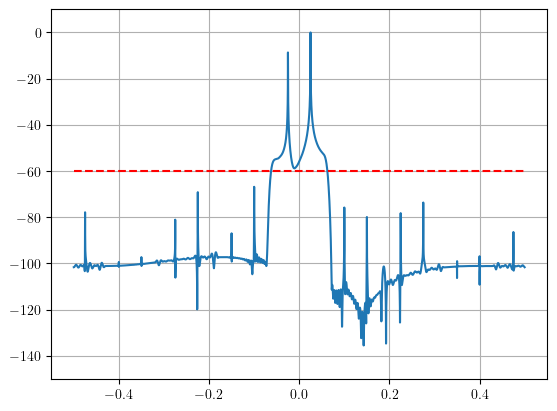

In [7]:
x_osr8 = x_real_osr8 + 1j*x_imag_osr8

plotdB(x_osr8, win = False)
plt.plot([-0.5,0.5], [-AdB, -AdB], '--r')
plt.ylim([-150, 10])
plt.show();

In [8]:
LUT_tread = LUT3
x_real_tread = convert_1b(np.round(x_real_osr8), LUT_tread)
x_imag_tread = convert_1b(np.round(x_imag_osr8), LUT_tread)

LUT_rise = LUT4
x_real_rise = convert_1b(np.floor(x_real_osr8), LUT_rise)
x_imag_rise = convert_1b(np.floor(x_imag_osr8), LUT_rise)

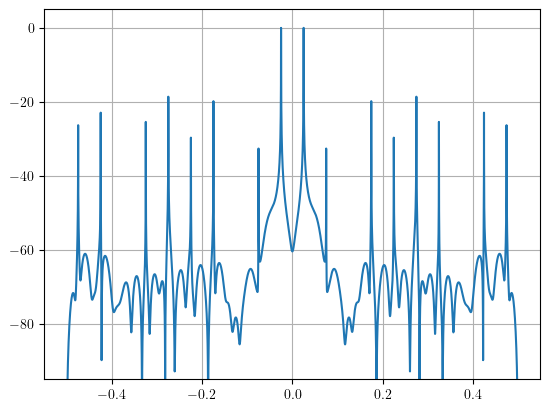

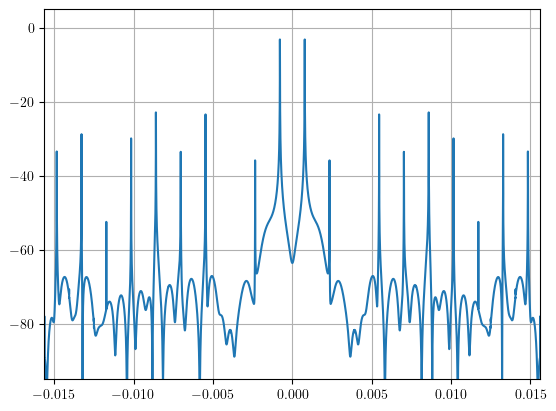

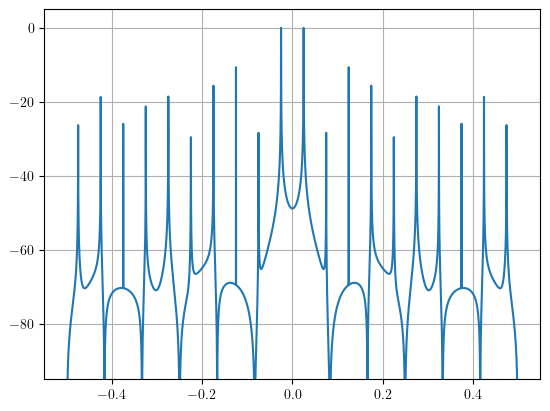

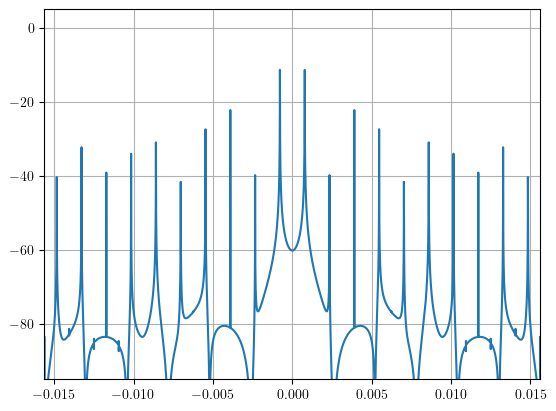

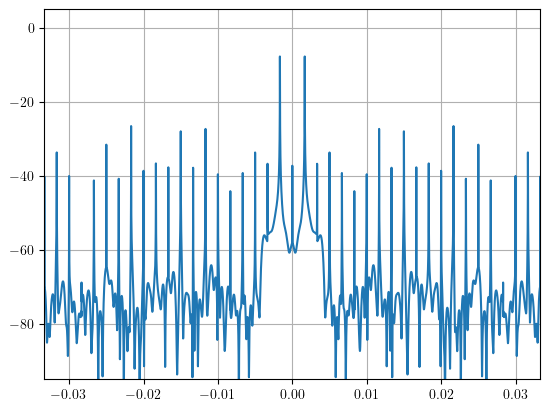

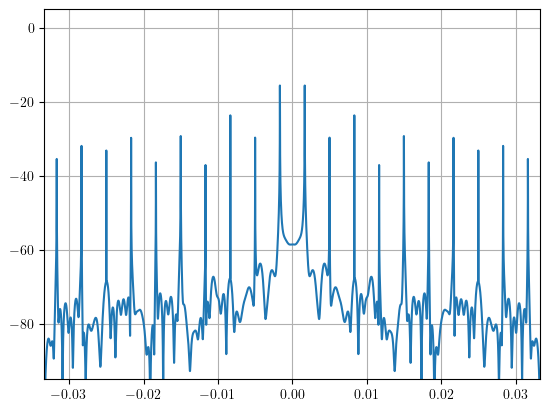

In [9]:
plotdB(np.round(x_real_osr8))
plt.ylim([-95, 5])
plt.show();

plotdB(x_real_tread)
plt.ylim([-95, 5])
plt.xlim([-0.5/len(LUT_tread[0]), 0.5/len(LUT_tread[0])])
plt.show();

plotdB(np.round(x_imag_osr8))
plt.ylim([-95, 5])
plt.show();

plotdB(x_imag_tread)
plt.ylim([-95, 5])
plt.xlim([-0.5/len(LUT_tread[0]), 0.5/len(LUT_tread[0])])
plt.show();

plotdB(x_real_rise)
plt.ylim([-95, 5])
plt.xlim([-0.5/len(LUT_rise[0]), 0.5/len(LUT_rise[0])])
plt.show();

plotdB(x_imag_rise)
plt.ylim([-95, 5])
plt.xlim([-0.5/len(LUT_rise[0]), 0.5/len(LUT_rise[0])])
plt.show();

# xfft_real = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x_real_tread))) + 1e-12)
# plt.plot(xfft_real)

In [10]:
def quant(x, typed="mid-tread"):
    y = []
    for i in range(len(x)):
        x_tmp = x[i] - int(x[i])
        if typed == "mid-tread":
            if x_tmp > -0.5 and x_tmp < 0.5:
                y_new = int(x[i])
            else:
                if x[i] > 0:
                    y_new = int(x[i]) + 1
                else:
                    y_new = int(x[i]) - 1
        elif typed == "mid-rise":
            if x[i] > 0:
                y_new = int(x[i])
            else:
                y_new = int(x[i]) - 1
        y.append(y_new)
    return np.array(y)

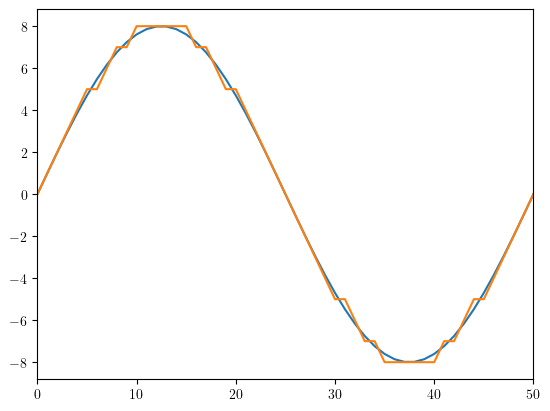

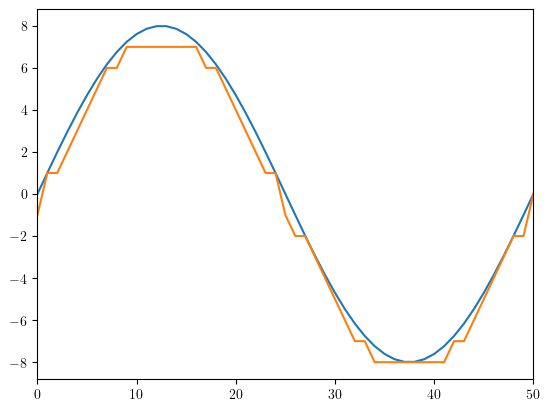

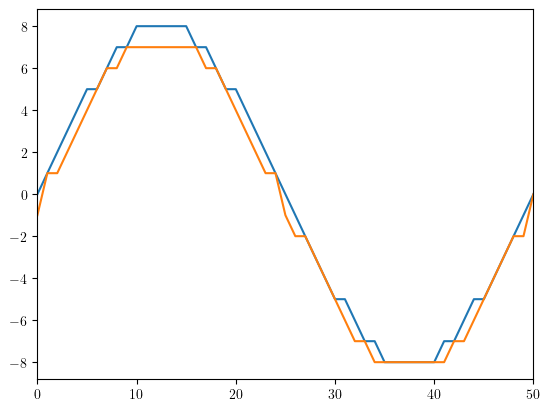

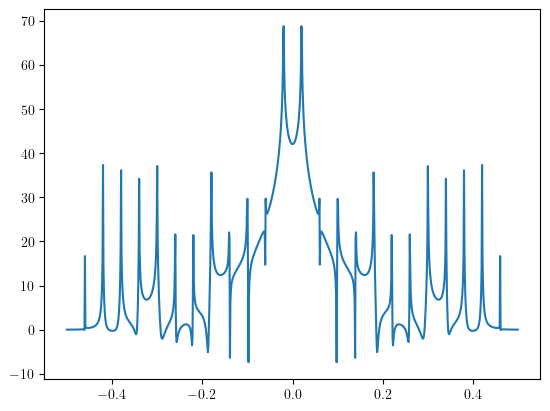

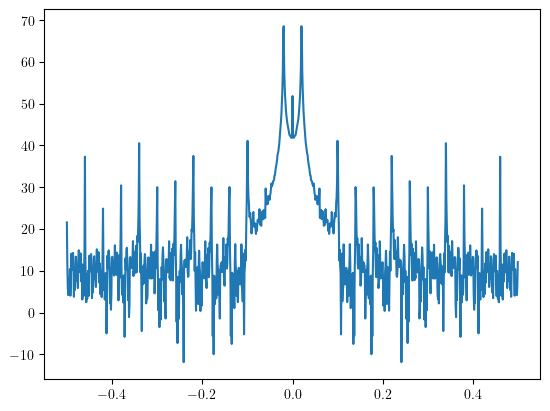

In [11]:
x = 2**3 * np.sin(2*np.pi*0.02*np.arange(1024))

x_rise = quant(x, typed="mid-rise")
x_tread = quant(x, typed="mid-tread")

xfft_rise = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x_rise))) + 1e-12)
xfft_tread = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x_tread))) + 1e-12)
freqs = np.arange(len(x)) / len(x) - 0.5

plt.plot(x)
plt.plot(x_tread)
plt.xlim([0, 50])
plt.show();

plt.plot(x)
plt.plot(x_rise)
plt.xlim([0, 50])
plt.show();

plt.plot(x_tread)
plt.plot(x_rise)
plt.xlim([0, 50])
plt.show();

plt.plot(freqs, xfft_tread)
plt.show();

plt.plot(freqs, xfft_rise)
plt.show();

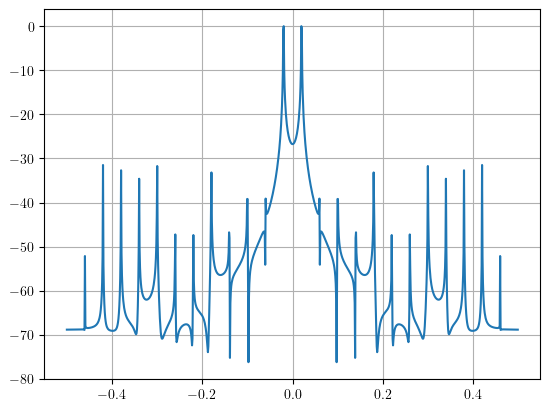

In [12]:
LUT = LUT1
# x_ser = x_rise
x_ser = np.round(x)
y_ser = convert_1b(x_ser, LUT)

xfftdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x_ser))) + 1e-12)
xfftdB -= np.max(xfftdB)
freqs = np.arange(len(xfftdB)) / len(xfftdB) - 0.5

plt.plot(freqs, xfftdB)
plt.grid()
plt.show();

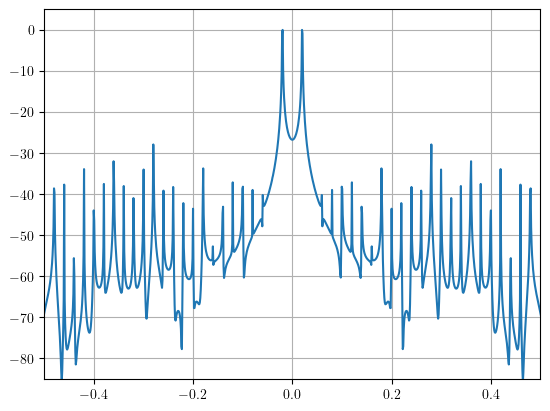

In [13]:
yfftdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y_ser))) + 1e-12)
yfftdB -= np.max(yfftdB)
freqs = (np.arange(len(yfftdB)) / len(yfftdB) - 0.5) * len(LUT[0])

plt.plot(freqs, yfftdB)
plt.xlim([-0.5, 0.5])
plt.ylim([-85, 5])
plt.grid()
plt.show();

0.0


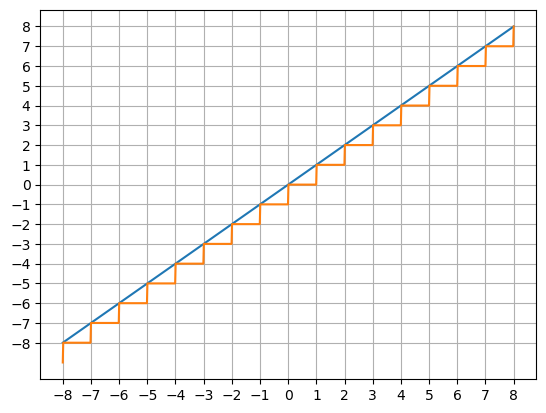

In [9]:


x_in = np.linspace(-8, 8, 1024)
print(np.mean(x_in))
# x_ser = np.round(x_in)
x_tread = np.array(quant(x_in, typed = "mid-tread"))
x_rise = np.array(quant(x_in, typed = "mid-rise"))

plt.plot(x_in, x_in)
plt.plot(x_in, x_rise)
# plt.plot(x_in, x_tread)
plt.xticks(np.arange(-8, 9, 1))
plt.yticks(np.arange(-8, 9, 1))
plt.grid();

In [12]:
np.floor(1.2)

1.0

0.00016456789372844792


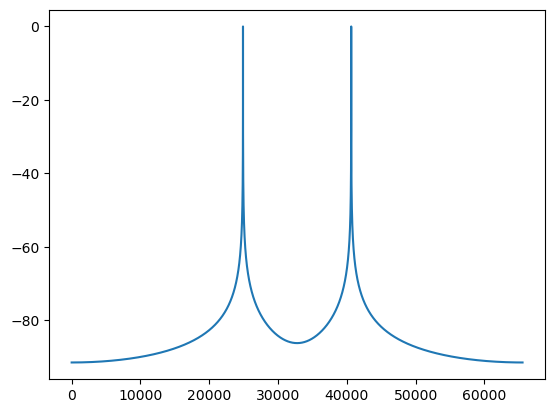

In [82]:
x = 8.0 * np.sin(2*np.pi*0.12*np.arange(2**16))
print(np.mean(x))

xfftdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x))) + 1e-12)
xfftdB -= np.max(xfftdB)
plt.plot(xfftdB)

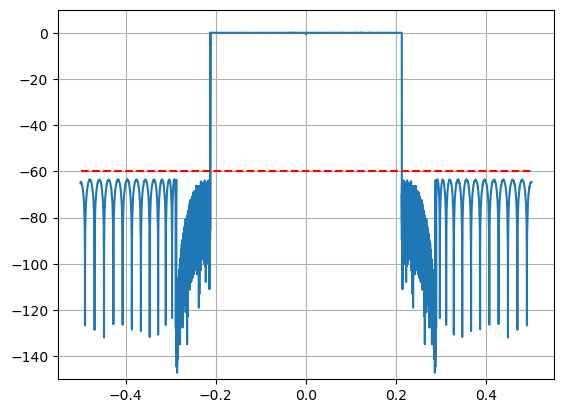

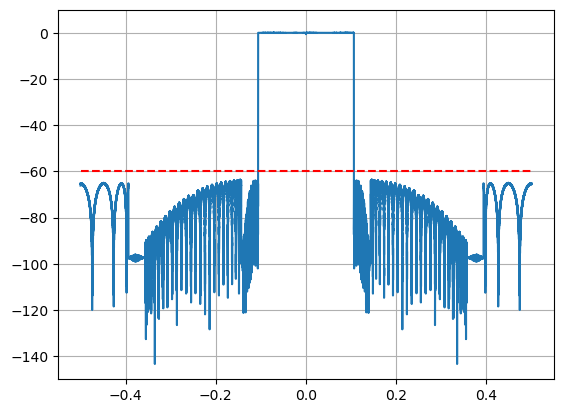

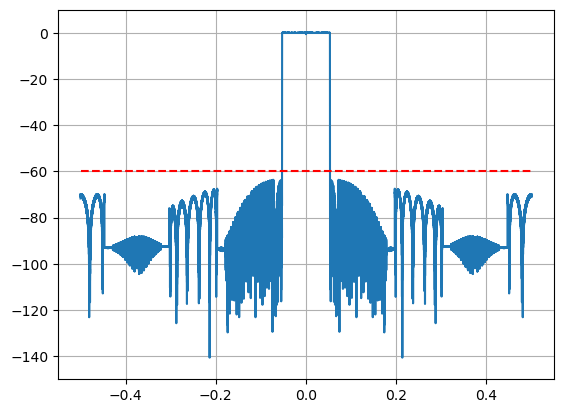

Fpass = [0.2125, 0.10625, 0.053125]
Fstop = [0.2875, 0.39375, 0.446875]
dF = [0.07499999999999998, 0.2875, 0.39375000000000004]
N_fir = [47, 11, 7]
[array([-8.29782898e-04, -3.14502611e-06,  1.50946649e-03,  1.88127428e-06,
       -2.79362858e-03, -6.46521600e-06,  4.72907470e-03,  5.28063189e-06,
       -7.51482450e-03, -1.01561872e-05,  1.14516105e-02,  9.67228666e-06,
       -1.69746701e-02, -1.47693676e-05,  2.48898199e-02,  1.37836841e-05,
       -3.68574681e-02, -1.83196893e-05,  5.72484127e-02,  1.66721530e-05,
       -1.02143985e-01, -2.03872314e-05,  3.16973544e-01,  5.00017764e-01,
        3.16973544e-01, -2.03872314e-05, -1.02143985e-01,  1.66721530e-05,
        5.72484127e-02, -1.83196893e-05, -3.68574681e-02,  1.37836841e-05,
        2.48898199e-02, -1.47693676e-05, -1.69746701e-02,  9.67228666e-06,
        1.14516105e-02, -1.01561872e-05, -7.51482450e-03,  5.28063189e-06,
        4.72907470e-03, -6.46521600e-06, -2.79362858e-03,  1.88127428e-06,
        1.50946649e-03, -3

In [135]:
F = [Fmax, 1-Fmax]
delta = [deltaPass, deltaStop]
x_osr8 = interpolate(x, I, F, delta, show=True, prt=True)

In [137]:
I = 8
N = 2**16
n = np.arange(N)

perc = 0.15
Fmax = 0.5 * (1 - perc)
print(f"Fmax = {Fmax}")
F = [Fmax, 1-Fmax]

AdB = 100
deltaPass = 10**(-AdB/20)
deltaStop = deltaPass
delta = [deltaPass, deltaStop]

F0 = 0.16
x = 1.0 * np.exp(1j * 2*np.pi*F0*n)

Fmax = 0.425


[0.08357681 0.503867   0.38018152 ... 0.34226926 0.49114258 0.18406545]


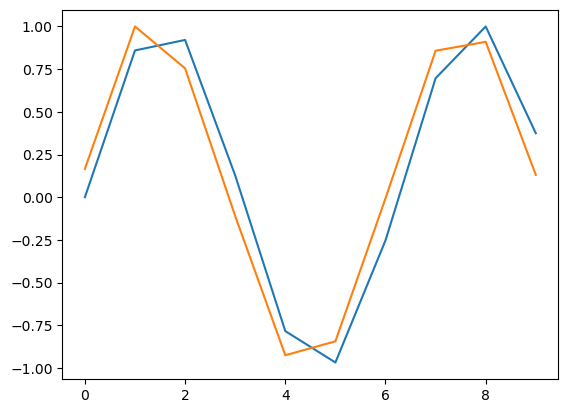

In [140]:
I = 2
Fpass = Fmax / I
Fstop = (1-Fmax) / I

firCoeff = remezlp(Fpass, Fstop, deltaPass, deltaStop, even_n = True, nPoints=N, Nmax=N)
x_delayed = delay(x.imag, firCoeff, I, 1)
print(x_delayed)

x_delayed /= np.max(x_delayed)
x_imag /= np.max(x_imag)

pp = 10
x_delayed_ = x_delayed[:pp]
x_imag = x.imag[:pp]

plt.plot(x_imag)
plt.plot(x_delayed_)

20
82
20


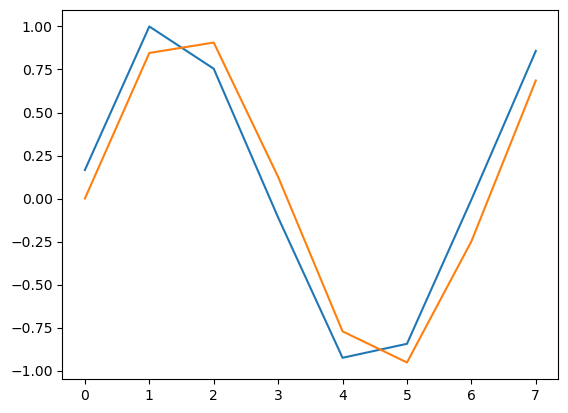

[-1.54984604e-05  3.90526466e-05 -8.82102761e-05  1.73846714e-04
 -3.13921295e-04  5.30800584e-04 -8.52357254e-04  1.31254384e-03
 -1.95229842e-03  2.82117009e-03 -3.98033167e-03  5.50838175e-03
 -7.51269685e-03  1.01521151e-02 -1.36848953e-02  1.85788314e-02
 -2.57990367e-02  3.77247228e-02 -6.22088820e-02  1.49110456e-01
  4.49917355e-01 -8.86152259e-02  4.74659761e-02 -3.10118408e-02
  2.18978808e-02 -1.60070475e-02  1.18646928e-02 -8.81145513e-03
  6.50509211e-03 -4.74588334e-03  3.40494293e-03 -2.39143724e-03
  1.63663372e-03 -1.08580192e-03  6.94019045e-04 -4.24010653e-04
  2.44917092e-04 -1.31624144e-04  6.39362400e-05 -2.74128709e-05
  7.79053911e-06]


In [98]:
Fpass = Fmax
Fstop = 1-Fmax

I = 2

Fpass /= I
Fstop /= I
firCoeff = remezlp(Fpass, Fstop, deltaPass, deltaStop, even_n = True, nPoints=N, Nmax=N)

polyFIR = makePolyphase(firCoeff, I)
fir = polyFIR[1]
xI_delay = signal.lfilter(fir, 1.0, x.imag)
# xI_delay = xI_delay[int(len(firCoeff)/I-1):]
# xR_delay = delay(x.real, firCoeff, 4, 2)
# x_delay = xR_delay + 1j * xI_delay
# x_delay = x.imag[100:]
delay = int((len(firCoeff)/I-1)/2)
# delay = int((len(fir)-1)/2)
print(delay)
# delay = 0
print(len(firCoeff))
print(delay)
pp = 8
xI_delay = xI_delay[delay:delay+pp]
x_imag = x.imag[0:pp]

xI_delay /= np.max(xI_delay)
x.imag /= np.max(x.imag)

plt.plot(xI_delay)
plt.plot(x_imag)
# plt.xlim([0, 20])
plt.show()

# Xfft = np.fft.fftshift(np.fft.fft(x_delay))
# XfftdB = 20 * np.log10(np.abs(Xfft) + 1e-15)
# XfftPhase = np.unwrap(np.angle(Xfft))

# Xfft_o = np.fft.fftshift(np.fft.fft(x))
# XfftPhase_o = np.unwrap(np.angle(Xfft_o))

# plt.plot(XfftdB)
# plt.show();

# plt.plot(XfftPhase)
# plt.plot(XfftPhase_o)
# # plotdB(x_delay)
# # plt.ylim([-AdB - 100, 5])
# plt.show();
print(fir)

In [89]:
(165)/4 / 2

20.625

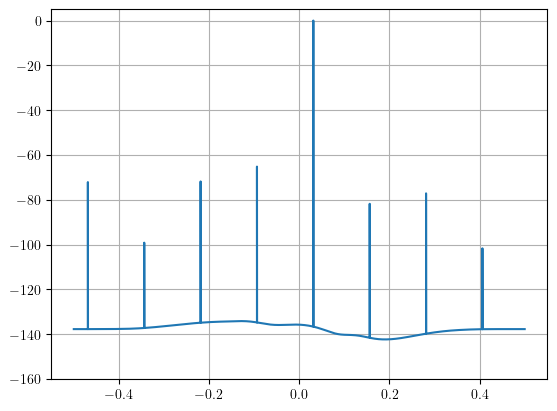

In [62]:
xReal_osr8 = interpolate(x.real, I, F, delta, show=False, prt=False)
xImag_osr8 = interpolate(x.imag, I, F, delta, show=False, prt=False)
x_osr8 = xReal_osr8 + 1j*xImag_osr8

plotdB(x_osr8)
plt.ylim([-AdB - 100, 5])
plt.show();

In [48]:
c = np.linspace(-100, 100, 2**12)
# print(c)
# print(np.round(c))
# print(np.floor(c))
# print(np.round(c-0.49))

a = np.floor(c)
b = np.round(c+0.5)-1

for i in range(len(a)):
    if a[i] != b[i]:
        print(f"a[{i}] = {a[i]}, b[{i}] = {b[i]}")

a[0] = -100.0, b[0] = -101.0
a[819] = -60.0, b[819] = -61.0
a[1638] = -20.0, b[1638] = -21.0
a[2457] = 20.0, b[2457] = 19.0
a[3276] = 60.0, b[3276] = 59.0
a[4095] = 100.0, b[4095] = 99.0
